In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')  # read the data
data   

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  C

In [4]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['Education_num','Marital_status','Relationship','Native_country'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(32517, 11)


In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32517.000000,32517,3.251700e+04,32517,32517,32517,32517,32517.000000,32517.000000,32517.000000,32517
unique,NaN,9,NaN,16,15,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,HS-grad,Prof-specialty,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22654,NaN,10481,4135,27776,21764,NaN,NaN,NaN,24678
mean,38.590860,NaN,1.898054e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.442292,NaN
std,13.639202,NaN,1.055761e+05,NaN,NaN,NaN,NaN,7390.180673,403.219959,12.348846,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.783830e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.370650e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [6]:
data['Capital_gain']=data['Capital_gain'].replace(0,data['Capital_gain'].mean())
data['Capital_loss']=data['Capital_loss'].replace(0,data['Capital_loss'].mean())
data['Workclass']=data['Workclass'].fillna(data['Workclass'].mode())
data['Occupation']=data['Occupation'].fillna(data['Occupation'].mode())

In [7]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32517.000000,32517,3.251700e+04,32517,32517,32517,32517,32517.000000,32517.000000,32517.000000,32517
unique,NaN,9,NaN,16,15,5,2,NaN,NaN,NaN,2
top,NaN,Private,NaN,HS-grad,Prof-specialty,White,Male,NaN,NaN,NaN,<=50K
freq,NaN,22654,NaN,10481,4135,27776,21764,NaN,NaN,NaN,24678
mean,38.590860,NaN,1.898054e+05,NaN,NaN,NaN,NaN,2068.118893,170.760096,40.442292,NaN
std,13.639202,NaN,1.055761e+05,NaN,NaN,NaN,NaN,7250.460339,385.168885,12.348846,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,114.000000,87.421964,1.000000,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.000000,NaN
50%,37.000000,NaN,1.783830e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,40.000000,NaN
75%,48.000000,NaN,2.370650e+05,NaN,NaN,NaN,NaN,1079.040194,87.421964,45.000000,NaN


In [8]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Workclass', 'Education', 'Occupation', 'Race', 'Sex', 'Income']

In [9]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Sex']) 
pd.Series(df)
data["Sex"]=df

In [10]:
df=label.fit_transform(data['Income']) 
pd.Series(df)
data["Income"]=df

In [11]:
df_dummies=pd.get_dummies(data[['Workclass', 'Education', 'Occupation', 'Race']],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset

In [12]:
data.shape

(32517, 52)

In [13]:
data.drop(columns=['Workclass','Education','Occupation','Race'],axis=1,inplace=True)

In [14]:
data.tail(3)

,Age,Fnlwgt,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
32557,58,151910,0,1079.040194,87.421964,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,22,201490,1,1079.040194,87.421964,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,52,287927,0,15024.000000,87.421964,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


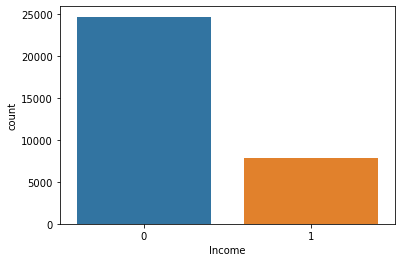

In [15]:
#plot each class frequency
sns.countplot(x='Income',data=data)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

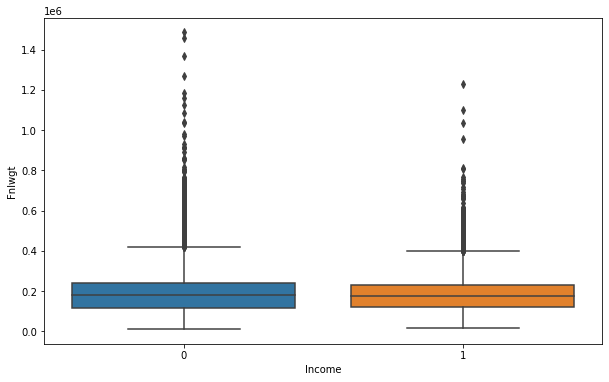

In [16]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Fnlwgt', x ='Income', data = data)

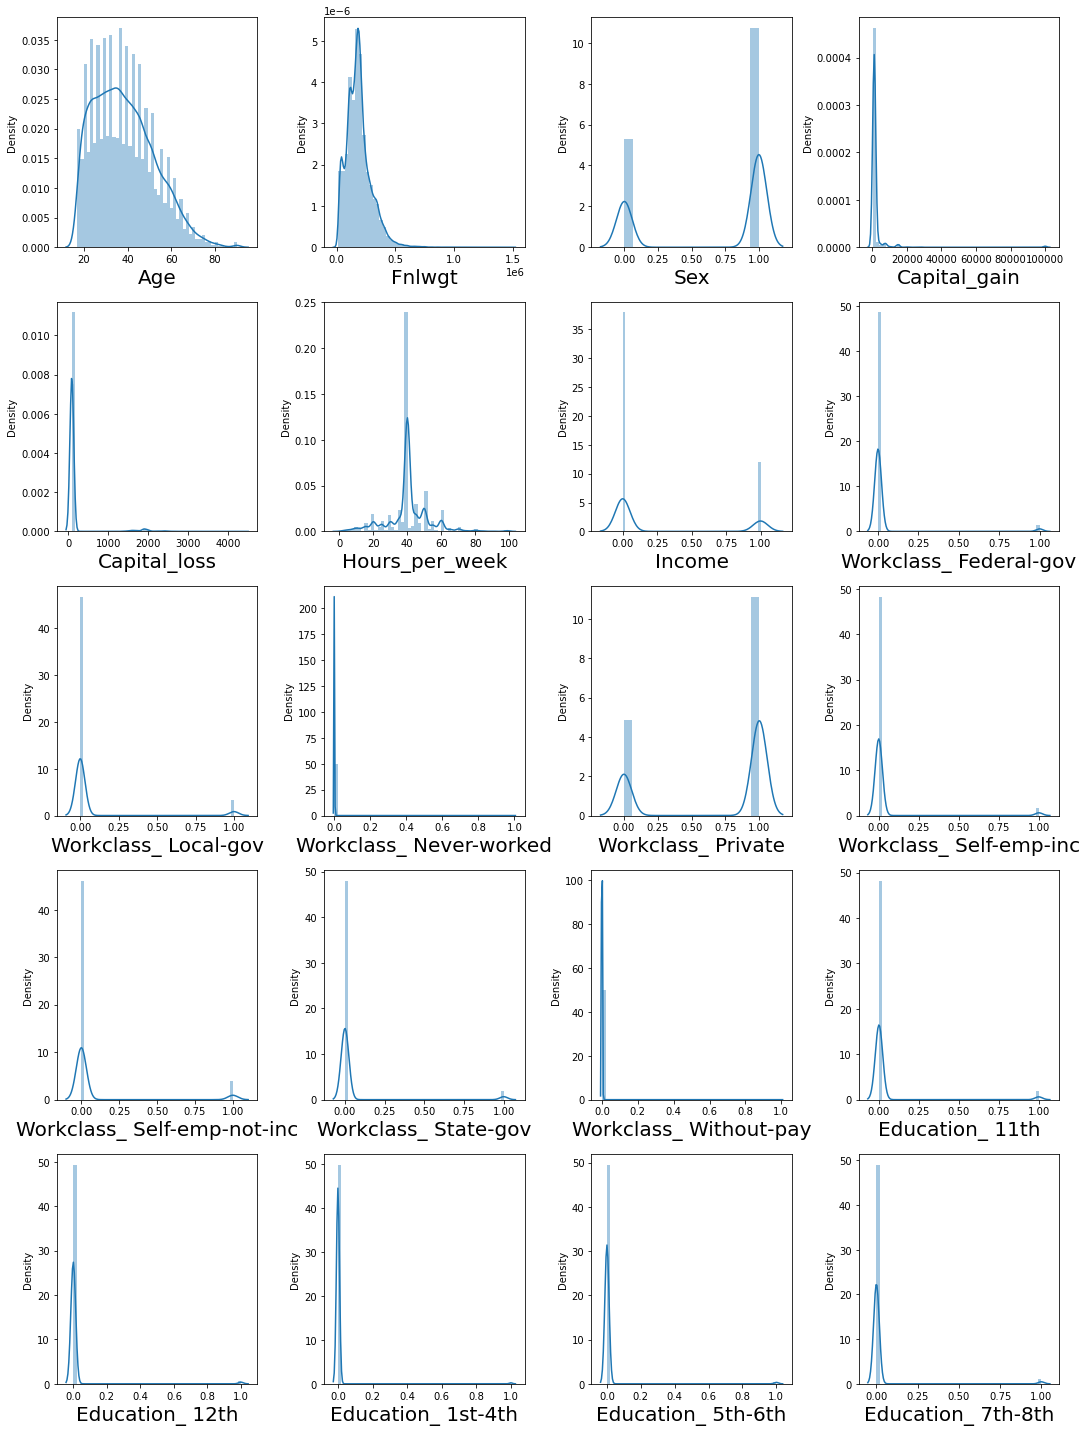

In [17]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

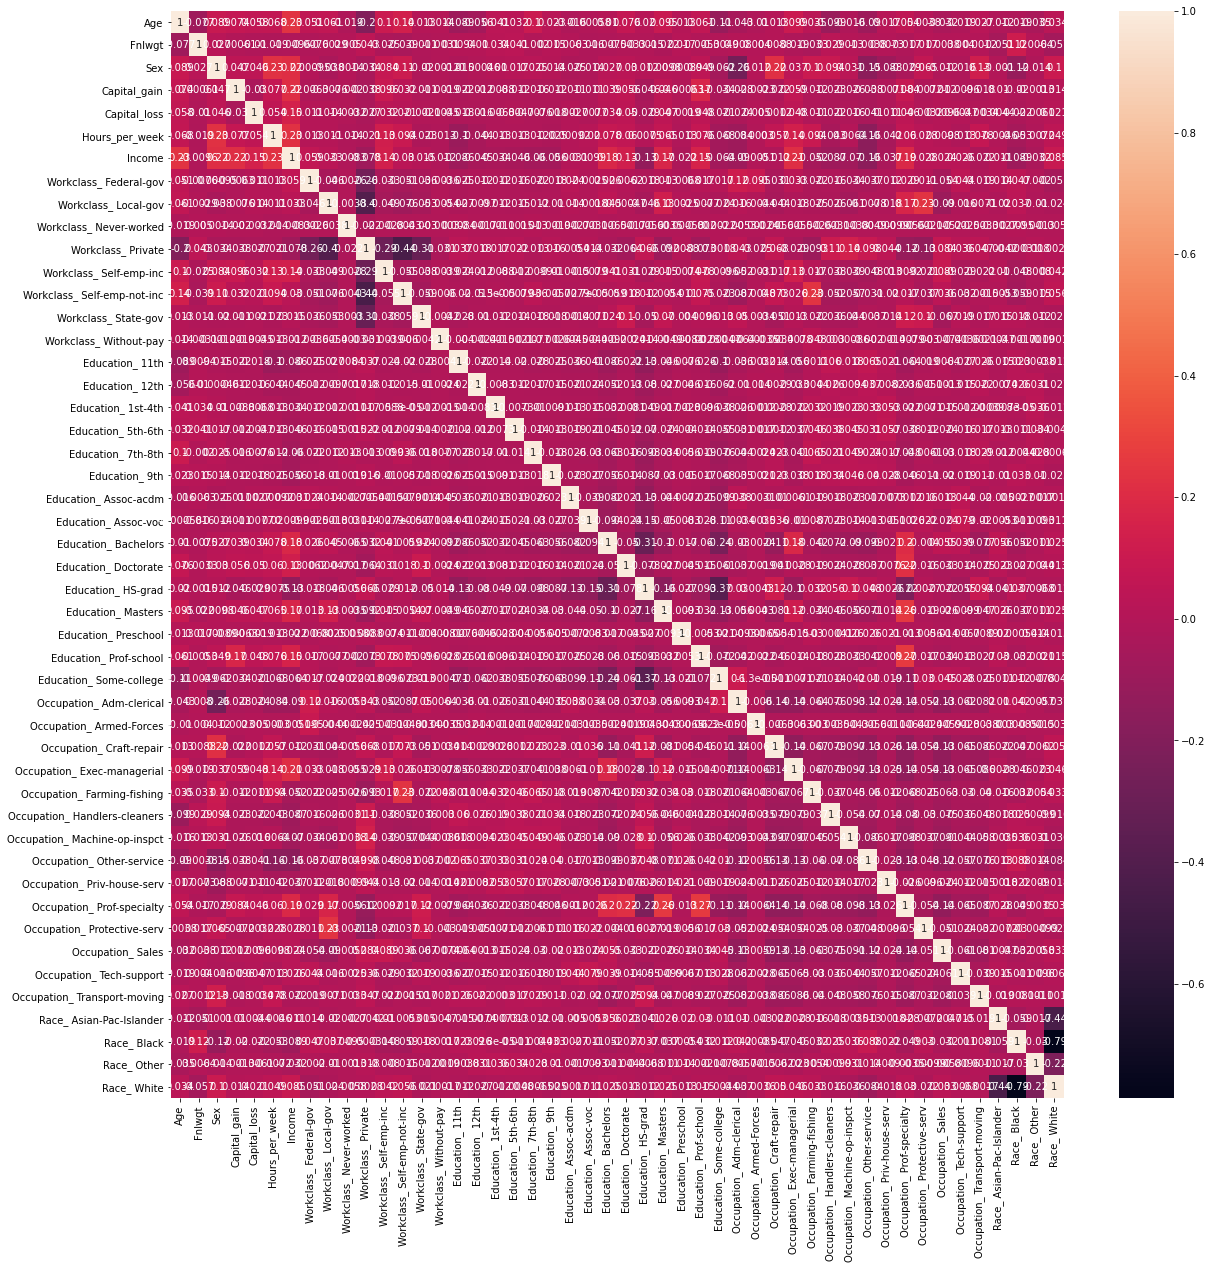

In [18]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [19]:
from sklearn.preprocessing import PowerTransformer

fetures=['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss','Hours_per_week',]
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [20]:
data[fetures]

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.891282,-1.089934,-0.241394,-2.775558e-17,-2.222121
1,0.101724,0.398535,-0.241394,-2.775558e-17,-0.035856
2,1.063833,0.562303,-0.241394,-2.775558e-17,-0.035856
3,-0.732624,1.339997,-0.241394,-2.775558e-17,-0.035856
4,0.027017,0.956867,-0.241394,-2.775558e-17,-0.035856
...,...,...,...,...,...
32555,-0.828913,0.746477,-0.241394,-2.775558e-17,-0.197818
32556,0.246416,-0.193417,-0.241394,-2.775558e-17,-0.035856
32557,1.334223,-0.219871,-0.241394,-2.775558e-17,-0.035856
32558,-1.359010,0.271482,-0.241394,-2.775558e-17,-1.655368


In [22]:
#As outliers present in salary first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [23]:
Age_H=(q3.Age+(1.5*iqr.Age))
Fnlwgt_H=(q3.Fnlwgt+(1.5*iqr.Fnlwgt))
Capital_gain_H=(q3.Capital_gain+(1.5*iqr.Capital_gain))
Capital_loss_H=(q3.Capital_loss+(1.5*iqr.Capital_loss))
Hours_per_week_H=(q3.Hours_per_week+(1.5*iqr.Hours_per_week))

In [24]:
Index=np.where(data['Age']>Age_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([], dtype=int64),)


(32517, 48)

In [25]:
Index=np.where(data['Fnlwgt']>Fnlwgt_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([   36,   181,   191,   214,   229,   311,   413,   507,   650,
         826,   913,   962,  1011,  1150,  1290,  1453,  1596,  1846,
        1970,  2064,  2341,  2346,  2368,  2759,  2769,  2823,  2849,
        2899,  2976,  3192,  3302,  3408,  3501,  3568,  3570,  3611,
        3718,  3737,  3743,  3746,  3868,  3904,  3962,  3981,  4276,
        4571,  4695,  4727,  4970,  5274,  5346,  5365,  5419,  5501,
        5526,  5549,  5618,  5723,  6014,  6140,  6163,  6214,  6254,
        6283,  6698,  6728,  6779,  6848,  6875,  7117,  7153,  7328,
        7347,  7451,  7500,  7659,  7715,  7930,  8032,  8233,  8254,
        8272,  8341,  8429,  8481,  8551,  8654,  8725,  8917,  8994,
        9014,  9042,  9243,  9317,  9611,  9695,  9710,  9731,  9743,
        9749,  9751,  9795, 10002, 10395, 10437, 10714, 10909, 11051,
       11323, 11331, 11456, 11689, 11830, 11878, 11971, 12022, 12054,
       12072, 12257, 12325, 12374, 12380, 12479, 12504, 12695, 12753,
       12824, 12840

(32199, 48)

In [26]:
Index=np.where(data['Capital_gain']>Capital_gain_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([    7,     8,    57, ..., 32176, 32186, 32198], dtype=int64),)


(29594, 48)

In [27]:
Index=np.where(data['Capital_loss']>Capital_loss_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([   20,    29,    48, ..., 29487, 29500, 29539], dtype=int64),)


(28084, 48)

In [28]:
Index=np.where(data['Hours_per_week']>Hours_per_week_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([    7,    17,    23, ..., 28057, 28058, 28062], dtype=int64),)


(25290, 48)

In [29]:
data.reset_index()
data

,Age,Fnlwgt,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0.891282,-1.089934,1,-0.241394,-2.775558e-17,-2.222121,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.101724,0.398535,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.063833,0.562303,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.732624,1.339997,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.027017,0.956867,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,-1.359010,1.143678,1,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32555,-0.828913,0.746477,0,-0.241394,-2.775558e-17,-0.197818,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32556,0.246416,-0.193417,1,-0.241394,-2.775558e-17,-0.035856,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,1.334223,-0.219871,0,-0.241394,-2.775558e-17,-0.035856,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


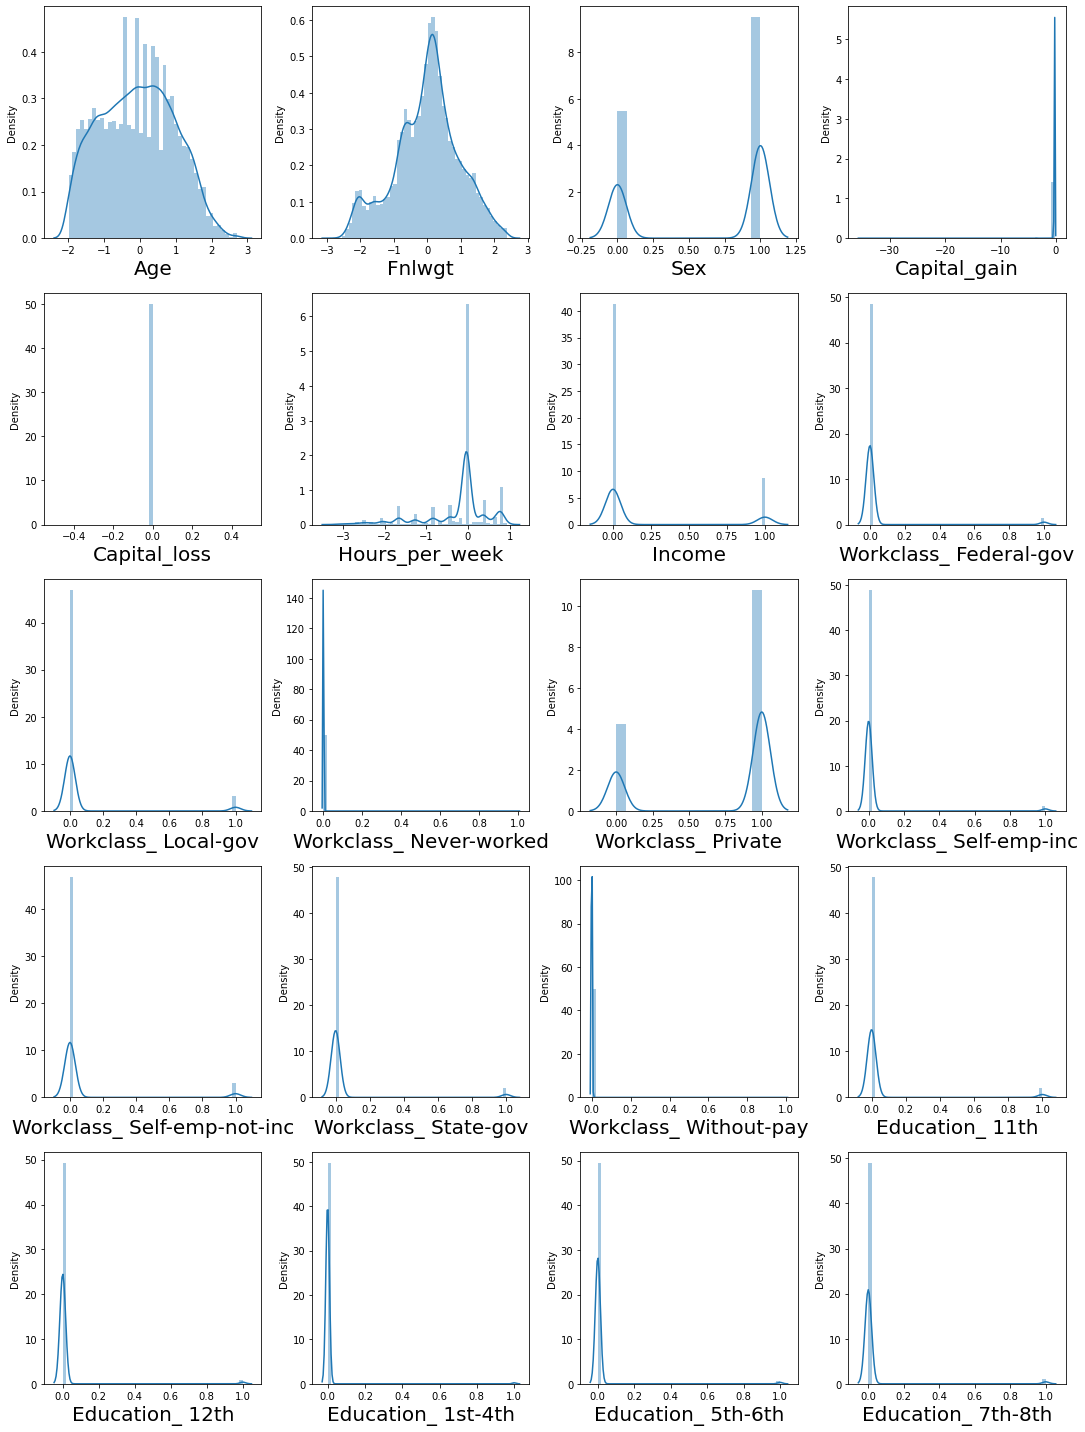

In [30]:
#Let's see the distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [33]:
# Let's Seperate the data 
x=data.drop(columns=['Income'])
y=data['Income']

In [34]:
print(data['Income'].value_counts())

0    20894
1     4396
Name: Income, dtype: int64


In [35]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [37]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=355)

In [53]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 14617, 1: 3086})
Counter({0: 14617, 1: 13155})


# Build Model to predict Income

In [54]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",r2_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [55]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [56]:
# Model no.1
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.9992778489259017
Test Report: 0.8163964676420192
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6277
           1       0.47      0.51      0.49      1310

    accuracy                           0.82      7587
   macro avg       0.68      0.70      0.69      7587
weighted avg       0.82      0.82      0.82      7587

Confusion Matrix: [[5524  753]
 [ 640  670]]
Accuracy: 86.52 %
Standard Deviation: 1.94 %


In [57]:
#Model no.2
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9994222791407213
Test Report: 0.7717147752734941
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6277
           1       0.36      0.43      0.40      1310

    accuracy                           0.77      7587
   macro avg       0.62      0.64      0.63      7587
weighted avg       0.79      0.77      0.78      7587

Confusion Matrix: [[5286  991]
 [ 741  569]]
Accuracy: 80.75 %
Standard Deviation: 1.39 %


In [58]:
#Model no.3
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.543167230525408
Test Report: 0.749176222485831
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.77      0.83      6277
           1       0.37      0.67      0.48      1310

    accuracy                           0.75      7587
   macro avg       0.65      0.72      0.66      7587
weighted avg       0.82      0.75      0.77      7587

Confusion Matrix: [[4806 1471]
 [ 432  878]]
Accuracy: 80.47 %
Standard Deviation: 0.90 %


In [59]:
#Model no.4
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier()

gbdt.fit(x_train_ns,y_train_ns)

print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.30702382929526006
Test Report: 0.7834453670752604
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.80      0.86      6277
           1       0.42      0.71      0.53      1310

    accuracy                           0.78      7587
   macro avg       0.68      0.75      0.70      7587
weighted avg       0.84      0.78      0.80      7587

Confusion Matrix: [[5013 1264]
 [ 379  931]]
Accuracy: 81.81 %
Standard Deviation: 1.23 %


In [60]:
#Model no.5
from sklearn.ensemble import BaggingClassifier

bb=BaggingClassifier()

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9640368765099041
Test Report: 0.8134967707921444
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6277
           1       0.46      0.45      0.45      1310

    accuracy                           0.81      7587
   macro avg       0.67      0.67      0.67      7587
weighted avg       0.81      0.81      0.81      7587

Confusion Matrix: [[5582  695]
 [ 720  590]]
Accuracy: 83.85 %
Standard Deviation: 2.51 %


In [61]:
#Model no.6
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.7040624898345118
Test Report: 0.8456570449453011
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.91      6277
           1       0.56      0.48      0.52      1310

    accuracy                           0.85      7587
   macro avg       0.73      0.70      0.71      7587
weighted avg       0.84      0.85      0.84      7587

Confusion Matrix: [[5792  485]
 [ 686  624]]
Accuracy: 84.43 %
Standard Deviation: 5.40 %


In [82]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1],'n_estimators':[20,50,70]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=2)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 70}


In [96]:
import xgboost as xgb
xgb=xgb.XGBClassifier(learning_rate= 0.1, max_depth=20,n_estimators=70)

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9027984654263672
Test Report: 0.8324766047185976
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6277
           1       0.52      0.49      0.50      1310

    accuracy                           0.83      7587
   macro avg       0.71      0.70      0.70      7587
weighted avg       0.83      0.83      0.83      7587

Confusion Matrix: [[5670  607]
 [ 664  646]]
Accuracy: 85.71 %
Standard Deviation: 3.23 %


In [79]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':(2,60,10),'max_depth':(0,20,2),'min_samples_split':range(2,20,2)}
rand=RandomizedSearchCV(estimator=rand_clf,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'n_estimators': 60, 'min_samples_split': 14, 'max_depth': 20}

In [80]:
rand_clf= RandomForestClassifier(n_estimators=60, min_samples_split=2, max_depth=50)
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.9989889884962624
Test Report: 0.8177145116646896
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6277
           1       0.47      0.51      0.49      1310

    accuracy                           0.82      7587
   macro avg       0.69      0.70      0.69      7587
weighted avg       0.82      0.82      0.82      7587

Confusion Matrix: [[5533  744]
 [ 639  671]]
Accuracy: 86.29 %
Standard Deviation: 2.09 %


# Looking at accuracy & confusion matrix i m selecting XGBClassifier with GridSearchCV hypertune parameter by using Kfold cross validation method¶


# lets check ROC AUC curve for fitted model

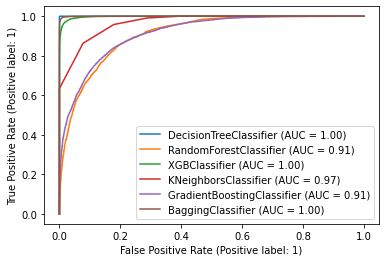

In [97]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(gbdt,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(bb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data

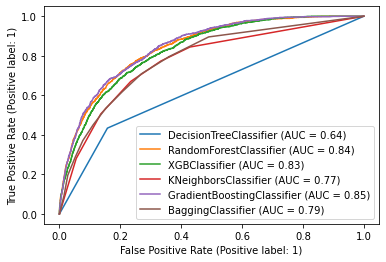

In [99]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bb,x_test,y_test,ax=disp.ax_)